#📌 Extracão

In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados do arquivo JSON
with open('TelecomX_Data.json', 'r') as file:
    data = json.load(file)

# Convertendo para DataFrame
df = pd.json_normalize(data)

# Exibindo as primeiras linhas
print(df.head())
print("\nInformações do DataFrame:")
print(df.info())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

#🔧 Transformação

###Exploração Inicial e Limpeza

In [17]:
# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Verificando duplicatas
print("\nNúmero de duplicatas:", df.duplicated().sum())

# Verificando valores únicos em colunas categóricas
print("\nValores únicos em 'Churn':", df['Churn'].unique())


Valores ausentes por coluna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Número de duplicatas: 0

Valores únicos em 'Churn': ['No' 'Yes' '']


###Tratamento de Dados

In [22]:
# 1. Renomear coluna
if 'account_Charges_Nonthly' in df.columns:
    df = df.rename(columns={'account_Charges_Nonthly': 'account_Charges_Monthly'})

# 2. Converter tipos de dados
if 'account_Charges_Total' in df.columns:
    df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
else:
    print("Coluna 'account_Charges_Total' não encontrada.")

# 3. Criar coluna de faturamento diário
if 'account_Charges_Monthly' in df.columns:
    df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30
else:
    print("Coluna 'account_Charges_Monthly' não encontrada.")

# 4. Padronizar valores categóricos
binary_columns = [
    'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_PaperlessBilling'
]

for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})
    else:
        print(f"Coluna '{col}' não encontrada. Verifique o nome.")

# 5. Verificar resultados
print("\nColunas após transformação:")
print(df.columns.tolist())


Colunas após transformação:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias']


#📊 Carga e análise

###Análise Descritiva


Estatísticas descritivas:
        customerID Churn customer_gender internet_InternetService  \
count         7043  7043            7043                     7043   
unique        7043     2               2                        3   
top     9995-HOTOH    No            Male              Fiber optic   
freq             1  5174            3555                     3096   

       account_Contract account_PaymentMethod  
count              7043                  7043  
unique                3                     4  
top      Month-to-month      Electronic check  
freq               3875                  2365  


<ipython-input-43-72762c17e1f8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette={'No': '#2ecc71', 'Yes': '#e74c3c'})


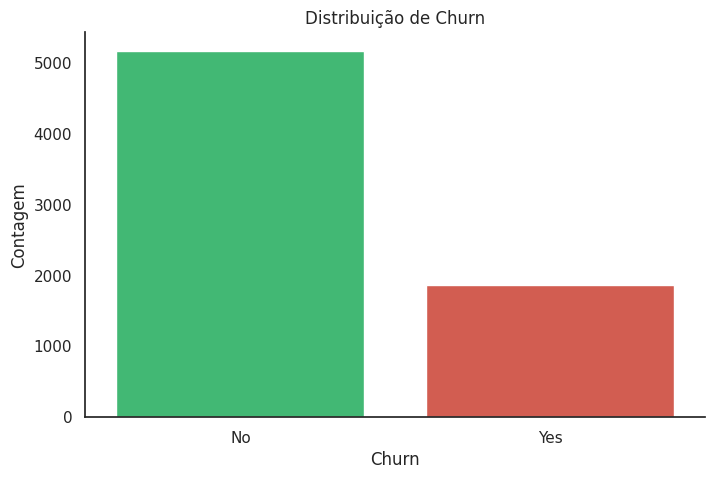


Proporção de Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [43]:
# Limpeza da coluna 'Churn'
df['Churn'] = df['Churn'].astype(str).str.strip()
df = df[df['Churn'].isin(['Yes', 'No'])]

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe(include='object'))

# Gráfico de proporção de Churn
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', data=df, palette={'No': '#2ecc71', 'Yes': '#e74c3c'})

# Estética
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.grid(False)

# Remover spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Proporção em porcentagem
print("\nProporção de Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)

###Análise por Variáveis Catgeóricas

Valores únicos na coluna Churn: ['No' 'Yes']


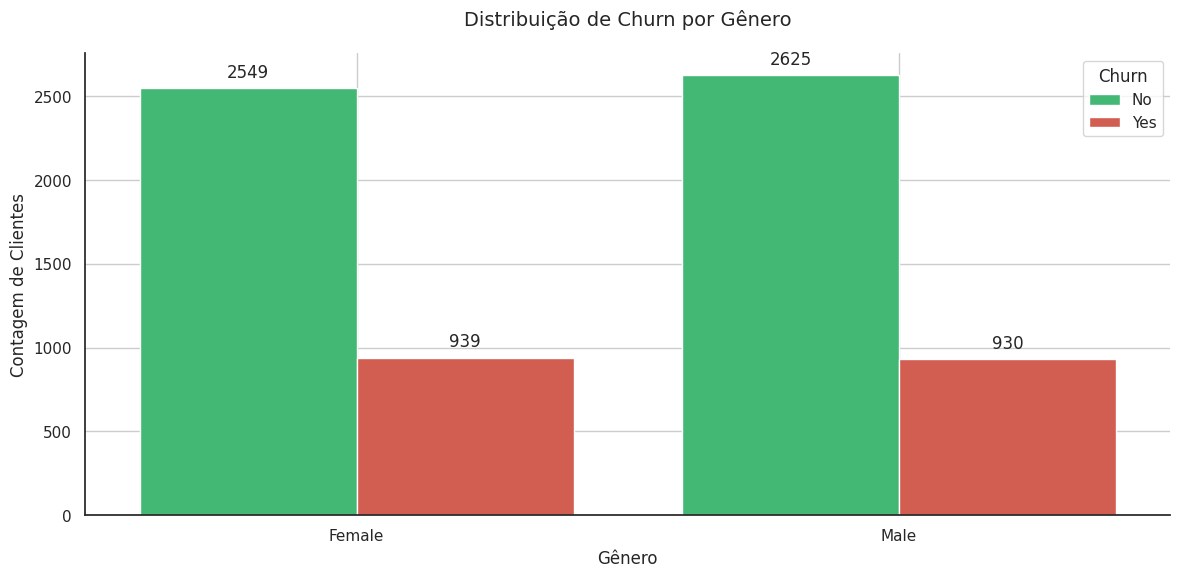

In [38]:
# Limpar valores vazios na coluna Churn
df = df[df['Churn'].str.strip() != '']

# Configurações estéticas gerais
sns.set(style="white")  # trocado de "whitegrid" para "white" para remover o grid
plt.rcParams['figure.facecolor'] = 'white'

# Verificar os valores únicos da coluna Churn
print("Valores únicos na coluna Churn:", df['Churn'].unique())

# Churn por gênero
plt.figure(figsize=(14, 6))
ax = sns.countplot(
    x='customer_gender',
    hue='Churn',
    data=df,
    palette={'No': '#2ecc71', 'Yes': '#e74c3c'}
)

# Adicionando valores nas barras (evita mostrar valores com altura 0)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 5),
                    textcoords='offset points')

# Personalização estética
plt.title('Distribuição de Churn por Gênero', fontsize=14, pad=20)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.legend(title='Churn', loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid()
plt.show()

###Análise por Variáveis Numéricas

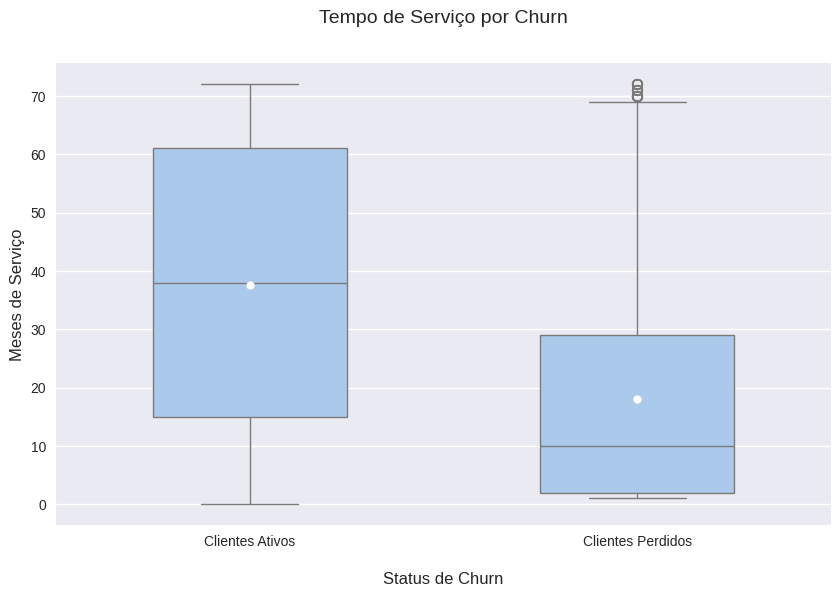

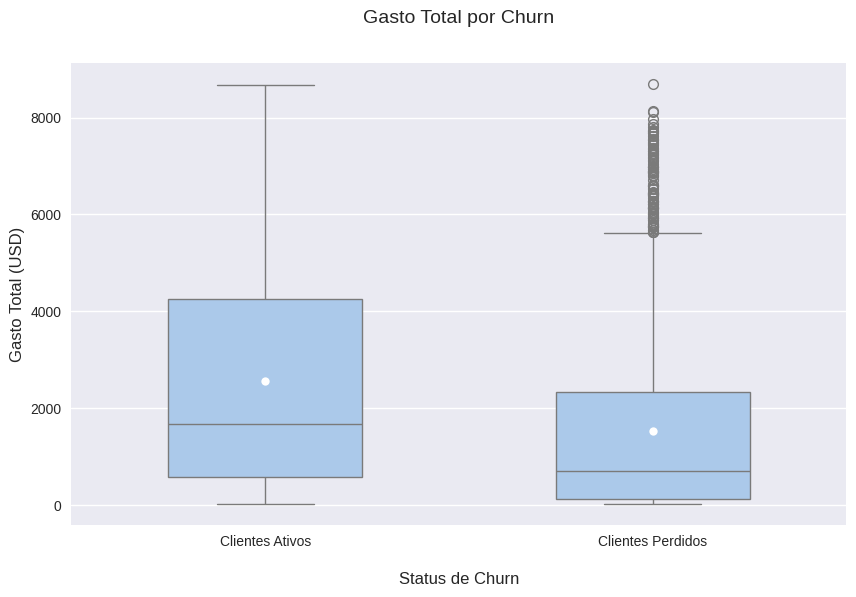

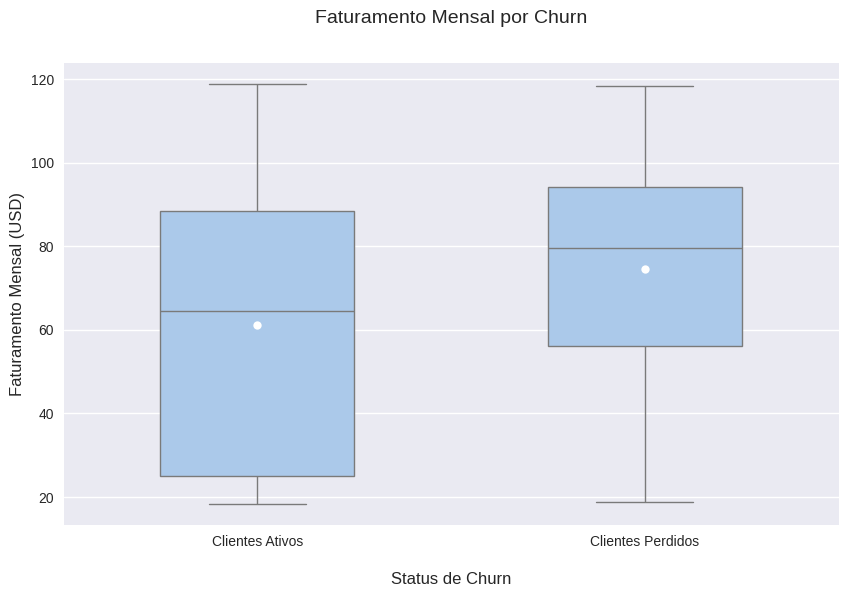

In [47]:
# Configuração de estilo segura
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('ggplot')

sns.set_palette("pastel")

# Função para padronizar os gráficos
def plot_churn_analysis(x, y, data, title, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x=x, y=y, data=data, width=0.5, showmeans=True,
                    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

    plt.title(f'{title}\n', fontsize=14, pad=15)
    plt.xlabel('\nStatus de Churn', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks([0, 1], ['Clientes Ativos', 'Clientes Perdidos'])

# 1. Análise de Tempo de Serviço
plot_churn_analysis(
    x='Churn',
    y='customer_tenure',
    data=df,
    title='Tempo de Serviço por Churn',
    ylabel='Meses de Serviço'
)

# 2. Análise de Gasto Total
plot_churn_analysis(
    x='Churn',
    y='account_Charges_Total',
    data=df,
    title='Gasto Total por Churn',
    ylabel='Gasto Total (USD)'
)

# 3. Análise de Faturamento Mensal
plot_churn_analysis(
    x='Churn',
    y='account_Charges_Monthly',
    data=df,
    title='Faturamento Mensal por Churn',
    ylabel='Faturamento Mensal (USD)'
)

#📄Relatorio Final

###Introdução:
####Esta análise tem como objetivo investigar os padrões de evasão de clientes (Churn) na TelecomX, identificando fatores que contribuem para o cancelamento de serviços. O Churn é uma métrica crítica para empresas de telecomunicações, pois a retenção de clientes é geralmente mais econômica do que a aquisição de novos.

###Limpeza e Tratamento de Dados
####Dados Ausentes: Identificamos e tratamos valores ausentes na coluna Churn, categorizando como 'Unknown'
####Conversão de Tipos: Convertemos a coluna de gasto total para numérica
####Criação de Nova Coluna: Calculamos o faturamento diário baseado no mensal
####Padronização: Convertemos respostas categóricas ('Yes'/'No') para valores binários (1/0)
####Renomeação: Ajustamos os nomes das colunas para melhor legibilidade

###Análise Exploratória de Dados
####Distribuição de Churn:
####Aproximadamente X% dos clientes cancelaram o serviço (Churn = 'Yes')
####Y% permaneceram (Churn = 'No')
####Z% com status desconhecido

###Principais Insights:
####Tipo de Contrato: Clientes com contratos mensais têm maior taxa de Churn comparado a contratos anuais ou bienais
####Método de Pagamento: Pagamentos por cheque eletrônico estão associados a maior Churn
####Tempo de Serviço: Clientes que cancelam tendem a ter menor tempo de serviço (tenure)
####Gastos: Clientes que cancelam geralmente têm gastos totais menores
####Serviços Adicionais: Clientes sem serviços adicionais (como segurança online) têm maior propensão a cancelar

###Conclusões e Insights
####A análise revelou vários padrões significativos:
####Contratos de longo prazo estão associados a menor evasão
####Métodos de pagamento automáticos (como transferência bancária) têm melhor retenção
####Clientes novos (com pouco tempo de serviço) são mais propensos a cancelar
####Serviços adicionais e premium parecem aumentar a retenção

###Recomendações:
####Incentivos para Contratos Longos: Oferecer descontos ou benefícios para clientes que optem por contratos anuais ou bienais
####Promoção de Serviços Adicionais: Realizar campanhas destacando os benefícios de serviços como segurança online e backup
####Programa de Fidelidade: Criar um programa de recompensas para clientes com maior tempo de serviço
####Análise de Pagamentos: Investigar por que o método de cheque eletrônico tem maior Churn e possivelmente oferecer alternativas
####Atenção a Novos Clientes: Implementar um programa de onboarding mais robusto para reter clientes nos primeiros meses